# Importing data

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

test = pd.read_csv("/Users/Cory/Desktop/Predicting_Disease_Spread/Data/dengue_features_test.csv")
train = pd.read_csv("/Users/Cory/Desktop/Predicting_Disease_Spread/Data/dengue_features_train.csv")
labels = pd.read_csv("/Users/Cory/Desktop/Predicting_Disease_Spread/Data/dengue_labels_train.csv")

In [37]:
#Merge

df = pd.merge(train, labels, on = ["city", "year", "weekofyear"])

In [38]:
#Convert city to dummy

mapping = {'sj': 0, 'iq': 1}
df = df.replace(mapping)

In [39]:
#Interpolate

df = df.interpolate(how = "linear")

In [40]:
#To Date Time

import datetime
df['date'] = df['week_start_date'].astype(str).apply(lambda x: pd.to_datetime(x, format='%Y-%m-%d'))

In [41]:
#Week columns to Datetime

from datetime import date
df['month'] = df['date'].dt.month

In [42]:
# Convert City to Dummy

mapping = {'sj': 0, 'iq': 1}
train2 = train.replace(mapping)

In [43]:
df.dtypes

city                                              int64
year                                              int64
weekofyear                                        int64
week_start_date                                  object
ndvi_ne                                         float64
ndvi_nw                                         float64
ndvi_se                                         float64
ndvi_sw                                         float64
precipitation_amt_mm                            float64
reanalysis_air_temp_k                           float64
reanalysis_avg_temp_k                           float64
reanalysis_dew_point_temp_k                     float64
reanalysis_max_air_temp_k                       float64
reanalysis_min_air_temp_k                       float64
reanalysis_precip_amt_kg_per_m2                 float64
reanalysis_relative_humidity_percent            float64
reanalysis_sat_precip_amt_mm                    float64
reanalysis_specific_humidity_g_per_kg           

# Split Train and Test

In [44]:
#Create Y

y = df.loc[:, ['total_cases']]
y.head(3)

,total_cases
0,4
1,5
2,4


In [45]:
#Features List

features=[
'city',
 'year',
 'weekofyear',
     'month',
 #'week_start_date',
 'ndvi_ne',
 'ndvi_nw',
 'ndvi_se',
 'ndvi_sw',
 'precipitation_amt_mm',
 'reanalysis_air_temp_k',
 'reanalysis_avg_temp_k',
 'reanalysis_dew_point_temp_k',
 'reanalysis_max_air_temp_k',
 'reanalysis_min_air_temp_k',
 'reanalysis_precip_amt_kg_per_m2',
 'reanalysis_relative_humidity_percent',
 'reanalysis_sat_precip_amt_mm',
 'reanalysis_specific_humidity_g_per_kg',
 'reanalysis_tdtr_k',
 'station_avg_temp_c',
 'station_diur_temp_rng_c',
 'station_max_temp_c',
 'station_min_temp_c',
 'station_precip_mm',
 #'total_cases',
 #'date',
]

In [46]:
#Create X

X = df.loc[:, features]
X.head(3)

,city,year,weekofyear,month,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,0,1990,18,4,0.12260,0.103725,0.198483,0.177617,12.42,297.572857,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,0,1990,19,5,0.16990,0.142175,0.162357,0.155486,22.82,298.211429,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,0,1990,20,5,0.03225,0.172967,0.157200,0.170843,34.54,298.781429,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4


In [47]:
from sklearn.model_selection import train_test_split, GridSearchCV
# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=123)

# Gradient Boosting (Basic Model)

In [50]:
from sklearn.metrics import classification_report
from sklearn import ensemble
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error

In [51]:
#Intialize Gradient Boosting Regressor
gb = ensemble.GradientBoostingRegressor()

#Fit Model
gb.fit(X_train, y_train)

#Predict Model
y_pred = gb.predict(X_test)

#Mean Abosolute Error
MAE = mean_absolute_error(y_test, y_pred)

print('mean absolute error: ', MAE)

C:\Users\Cory\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


mean absolute error:  11.12513457602615


# Grid Search

In [53]:
import warnings
warnings.filterwarnings('ignore')

In [54]:
# grid search cv
gb_parameters = {'n_estimators': [100, 300, 500], 
                 'learning_rate': [0.001, 0.01, 0.1], 
                 'max_depth': range(2, 7, 2)
                }
gb_grid = GridSearchCV(gb, param_grid = gb_parameters, cv = 3, verbose=1)
gb_grid.fit(X_train, y_train)

gb_params = gb_grid.best_params_

tuned_gb = ensemble.GradientBoostingRegressor(**gb_params)
tuned_gb.fit(X_train, y_train)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=1)]: Done  81 out of  81 | elapsed:  1.7min finished


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=4, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=300, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [55]:
y_pred = tuned_gb.predict(X_test)
MAE = mean_absolute_error(y_test, y_pred)
print('mean absolute error: ', MAE)

mean absolute error:  9.882413458726608


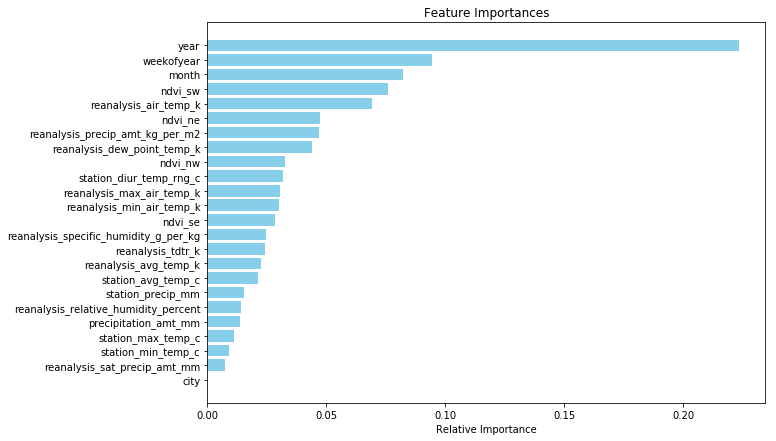

In [56]:
importance = gb.feature_importances_ 
indices = np.argsort(importance)

fig = plt.figure(figsize = (10, 7))

plt.title('Feature Importances')
plt.barh(range(len(indices)), importance[indices], color='skyblue', align='center')

plt.yticks(range(len(indices)), X_test.columns[indices])
plt.xlabel('Relative Importance')
plt.show()